# PONTIFÍCIA UNIVERSIDADE CATÓLICA
## CDIA - Ciência de Dados e Inteligência Artificial

Gabriel Crespi de Santana, RA: 00274413

Kevin Egídio de Toledo, RA: 00282590

Pedro Lucas S. Ferreira, RA: 00285608 

## Mini projeto KNN  (k-Vizinhos Mais Próximos) 

## Questão de Projeto
Como o uso da raiz quadrada do tamanho do conjunto de treinamento como o valor de k no
kNN se compara (F1 score) à descoberta do k com o uso de classes como Pipeline e GridSearchCV?

## Introdução

KNN ou K Vizinhos mais Próximos (do inglês: K Nearest Neighbors) é um dos algoritmos para aprendizado supervisionado de máquinas, que visa a criação de um modelo de IA capaz de predizer a categoria (classe, rótulo) de um elemento dados seus atributos, muito utilizado no campo de Data Mining e Machine Learning. Embora seja um algoritmo simples, demonstra eficiência.

Aprendizado supervisionado se trata de quando o modelo de IA aprende através de dados pré-definidos e rotulados, ou seja, dados que já estão categorizados de acordo com seus atributos, sendo possível fazer ajustes com base nos resultados temporários.

## Como funciona o KNN

O algoritmo KNN verifica quais são os `k` vizinhos mais próximos de uma nova observação (elemento com atributos) em um gráfico de dispersão e define a sua classe a partir da moda matemática (elemento que mais repete nesta área) de classes destes vizinhos.

A imagem abaixo exemplifica a classificação de uma observação (ponto vermelho) a partir se seus `k` vizinhos, considerando 3 vizinhos a classe é dada como B, mas considerando 6 vizinhos a classe é dada como A, portanto o valor de `k` interfere diretamente na classificação.

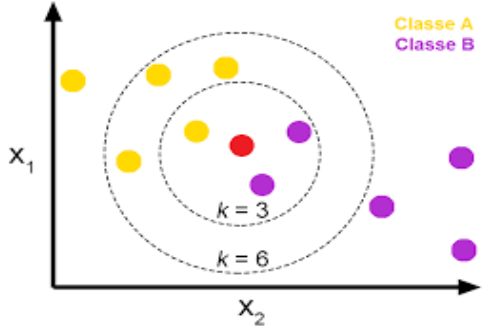

## Quando é válido aplicar o KNN?
Para conseguir implementar o algoritmo KNN com êxito existem algumas condições:

1. O dataset precisa estar rotulado, ou seja, para conseguir prever a classe de novas observações é preciso ter uma base com dados cujas classes já são conhecidas
2. Os dados não podem possuir ruídos (erros)
3. É desejável que se aplique somente em pequenos datasets

(dataset: conjunto de dados)

## Implementação

Neste projeto serão usados três datasets para exemplificar a implementação do algoritmo KNN, os datasets são públicos e foram retirados da plataforma https://www.kaggle.com/. Por questões de praticidade, os dados foram tratados previamente de forma que seja possível carregar somente o necessário para a implementação do algoritmo e salvos em um pequeno pacote.

Dataset 1 (dados de envio em e-commerce): https://www.kaggle.com/prachi13/customer-analytics

Dataset 2  (possibilidade de ataque cardíaco): https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

Dataset 3 (classificação de vidros): https://www.kaggle.com/uciml/glass

### Dataset 1: dados de envio em e-commerce

O primeiro conjunto de dados trata sobre dados de envio de produtos por ecommerce. Possui os seguintes atributos:
- Bloco de armazém: a empresa em questão possui um grande armazém dividido em blocos A,B,C,D,E (onde A=0,B=1,C=2,D=3,E=4);
- Modo de envio: pode ser por Navio, Voo ou Estrada (Navio=0, Voo=1 e Estrada=2);
- Chamadas de atendimento ao cliente: número de chamadas para consulta da remessa;
- Avaliação do cliente: 1 é o mais baixo (pior), 5 é o mais alto (melhor);
- Custo do produto: custo do produto em dólares estadunidenses;
- Compras anteriores: número de compras anteriores do determinado produto;
- Importância do produto: categarizada como baixa, média e alta (baixa=0, média=1 e alta=2);
- Peso: a unidade de media é em gramas.

E é classificado de duas formas:
- 0: significa que o produto chegou dentro do prazo;
- 1: o produto não chegou dentro do prazo.

In [1]:
# importação do pacote com os datasets de exemplo
import knn_miniproj as mini

In [2]:
# importação das bilbiotecas para o algoritmo KNN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [3]:
# carregando os dados
ecommerce = mini.ecommerce()

atribs = ecommerce.data
target = ecommerce.target

### Como funciona o StandardScaler( )
Para o algoritmo KNN ser implementado corretamente os dados precisam ser padronizados, `StandardScaler()` é um objeto do pacote sklearn que padroniza os dados removendo a média e escalonando para a variância da unidade. Para fazer isso é utilizada a seguinte fórmula:

$z = \frac{x - u}{s}$

Onde:
- `z` é o resultado da padronização
- `x` é o dado em si (atributo em formato numérico)
- `u` é a média das amostras ou `0` se o paramêtro `with_mean` estiver marcado como `False`
- `s` é o desvio padrão das amostras ou `1` se o parâmetro `with_std` estiver marcado como `False`

### Diferenças entre .fit( ) e .fit_transform( )
`fit()` e `fit_transform()` são métodos do objeto `StandardScaler()`. O primeiro calcula a média e o padrão a serem usados para escalonamento posterior. Já o segundo se ajusta aos dados e depois os transforma.


In [4]:
# padronizando os dados
padronizador = StandardScaler()
atributos_padronizados = padronizador.fit_transform(atribs)

atributos_padronizados

array([[ 0.41006101,  0.71908492,  0.2613987 , ..., -0.2175177 ,
        -0.97646729, -1.51677845],
       [ 1.07863874,  0.71908492,  0.2613987 , ..., -0.89726049,
        -0.97646729, -0.29900189],
       [-1.59567219,  0.71908492, -1.77547429, ...,  0.4622251 ,
        -0.97646729, -0.11124766],
       ...,
       [ 1.07863874, -0.66377069,  2.29827169, ...,  0.4622251 ,
         0.45250923,  0.70410462],
       [ 0.41006101, -0.66377069, -1.77547429, ...,  1.1419679 ,
        -0.97646729,  0.73824175],
       [ 1.07863874, -0.66377069,  0.2613987 , ..., -0.2175177 ,
        -0.97646729,  0.80782898]])

In [5]:
# obter os vizinhos mais próximos (uma quantidade escolhida arbitrariamente)
vizinhos_mais_proximos = NearestNeighbors(n_neighbors=5).fit(atributos_padronizados)

In [6]:
# considerar uma nova observação
ajuste_array = [0, 1, 4, 3, 94, 3, 0, 713] # TODO colocar atributos parecidos com os do dataset original

In [7]:
distâncias, índices = vizinhos_mais_proximos.kneighbors([ajuste_array])
distâncias, índices


(array([[717.42526863, 717.43442614, 717.5681305 , 717.57054461,
         717.59171628]]),
 array([[277, 174, 229, 151, 247]], dtype=int64))

## Criando um classificador dos `k` vizinhos mais próximos
O objeto KNeighborsClassifier() cria um classificador com base em um `k` escolhido arbitrariamente.

In [8]:
# importação das bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
# mostrar o dataset dividido em atributos e classes de forma numérica
x_ecommerce = ecommerce.data
y_ecommerce = ecommerce.target

In [10]:
x_ecommerce

[array([   3,    1,    4,    2,  177,    3,    0, 1233], dtype=int64),
 array([   4,    1,    4,    5,  216,    2,    0, 3088], dtype=int64),
 array([   0,    1,    2,    2,  183,    4,    0, 3374], dtype=int64),
 array([   1,    1,    3,    3,  176,    4,    1, 1177], dtype=int64),
 array([   2,    1,    2,    2,  184,    3,    1, 2484], dtype=int64),
 array([   4,    1,    3,    1,  162,    3,    1, 1417], dtype=int64),
 array([   3,    1,    3,    4,  250,    3,    0, 2371], dtype=int64),
 array([   4,    1,    4,    1,  233,    2,    0, 2804], dtype=int64),
 array([   0,    1,    3,    4,  150,    3,    0, 1861], dtype=int64),
 array([   1,    1,    3,    2,  164,    3,    1, 1187], dtype=int64),
 array([   2,    1,    3,    4,  189,    2,    1, 2888], dtype=int64),
 array([   4,    1,    4,    5,  232,    3,    1, 3253], dtype=int64),
 array([   3,    1,    3,    5,  198,    3,    1, 3667], dtype=int64),
 array([   4,    1,    4,    4,  275,    3,    2, 2602], dtype=int64),
 array

In [11]:
print(y_ecommerce)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
# criar o padronizador
padronizador = StandardScaler()
X_std = padronizador.fit_transform(x_ecommerce)

In [13]:
# criar o classificador
knn = KNeighborsClassifier(n_neighbors=6, n_jobs=1).fit(X_std, y_ecommerce)

In [14]:
# novas observações (produtos)
novas_observacoes = [
    [0, 1, 4, 3, 199, 3, 0, 101],
    [3, 1, 3, 5, 324, 3, 1, 3667]
]

In [15]:
# predizer a clase das novas observações
knn.predict(novas_observacoes)

array([0, 0], dtype=int64)

## Qual distância utilizar?
##### Euclidiana
   A distância Euclideana é uma das mais famosas e também mais usadas. É uma boa opção quando as variáveis de entrada forem de tipos semelhantes e de valor real, como por exemplo em casos de alturas e larguras, em que ambas possuem o mesmo tipo de medida (metro).

$d(x,y) = \sqrt{\sum_{i=1}^{n} {(x_{i}-y_{i})^2}}$
   
##### Manhattan
   A Manhattan, possui características parecidas com a Euclidiana, porém ela é mais indicada para situações em que suas variáveis de entrada não são semelhantes, como no caso de idade, peso, altura e etc. Essa distância é preferível à distância euclidiana quando temos um caso de alta dimensionalidade.
   
$d = \sum_{i=1}^{n} {|x_{i}-y_{i}|}$




##### Hamming
   Hamming é uma métrica que compara duas cadeias de dados binários de comprimento igual. Este método examina todos os dados e descobre quando os pontos de dados são semelhantes e diferentes um para um. Por exemplo, ele irá verificar as string "ABCD" e "AEQO", como podemos analisar, somente o valor de A se encontra no local correto portanto neste caso a distância hamming será 3, pois são os valores que estão diferentes nessa string.

    
##### Minkowski  
A Distância minkowski é uma generalização para as distâncias Euclidiana(para p = 2), Manhattan(para p = 1) e Chebshev(para p = $\infty$). Usada quando não se tem certeza de qual métrica é a ideal para o devido modelo.


$d(x,y) = \sqrt[p]{(x_1 - y_1)^p + (x_2 - y_2)^p + \cdots + (x_N - y_N)^p}$


## Qual o `k` ideal?
Com o intuito de alcançar o melhor modelo de predição possível, é importante encontrar o `k` ideal, ou seja, o número de vizinhos a serem usados no algoritmo que resulta no melhor modelo (aquele que possui mais precisão). Para isso, são usados dois objetos do pacote sklearn: `GridSearchCV()` e `Pipeline()`


GridSearchCV: faz uma busca exaustiva sobre determinados parâmetros para encontrar um estimador.

Pipeline: aplica sequencialmente uma lista de transformações e um estimador final. As etapas intermediárias do pipeline devem ser "transformadas", ou seja, devem implementar métodos de ajuste e transformação. O estimador final só precisa implementar o ajuste. Os transformadores no pipeline podem ser armazenados em cache usando o argumento `memory`. O objetivo do pipeline é reunir várias etapas que podem ser validadas em conjunto durante a definição de parâmetros diferentes.

In [16]:
# importação de bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [17]:
# carregar os dados
atributos = ecommerce.data
alvo = ecommerce.target

In [18]:
# padronizador
padronizador = StandardScaler()
atributos_padronizados = padronizador.fit_transform(atributos)

In [19]:
# classificador
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [20]:
# criar um pipeline
pipe = Pipeline([("padronizador", padronizador), ("knn", knn)])

In [21]:
# criar um espaço de busca de candidatos
espaço_de_busca = [{"knn__n_neighbors": [n for n in range(1,31)]}]

# a lista valor da chave "knn__n_neighbors" contém todos os números de 1 a 30
# logo, esses são os valores candidatos a k_ideal

In [22]:
# criar um grid de busca
classificador = GridSearchCV(pipe, espaço_de_busca, cv=6, verbose=0).fit(atributos_padronizados, alvo)

In [23]:
# mostrar a melhor estimação do valor de k (k ideal)
k_ideal = classificador.best_estimator_.get_params()["knn__n_neighbors"]
k_ideal

15

### Aproximação do valor de `k`
Há uma forma de obter um valor aproximado do `k` ideal, dada pelo cálculo da raiz quadrada do tamanho do conjunto de dados. Entretanto, não é a forma mais indicada de se obter o melhor número de vizinhos para utilizar no algoritmo.

In [24]:
# verificação empírica da regra prática (aproximação do valor de k)
from math import sqrt
raiz = int(sqrt(len(alvo)))
print("Tamanho do dataset: {}".format(len(alvo)))
print("raiz quadrada (inteira) do tamanho do dataset {}".format(raiz))

Tamanho do dataset: 300
raiz quadrada (inteira) do tamanho do dataset 17


## Testando a acurácia do modelo com `k_ideal`


Com o intuito de verificar a acurácia do modelo de predição com KNN, existem funções do pacote sklearn que calculam sua precisão.

In [25]:
# importação de bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [26]:
# dividir o conjunto em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(atributos, alvo, random_state=0, test_size=.3)

In [27]:
# padronizar os atributos
padronizador = StandardScaler()
X_treino = padronizador.fit_transform(X_treino)
X_teste = padronizador.transform(X_teste)

In [28]:
# classificador
classificador = KNeighborsClassifier(n_neighbors=k_ideal, metric="euclidean")
classificador.fit(X_treino, y_treino)
y_pred = classificador.predict(X_teste)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

### Matriz de confusão (conceito)

Uma matriz de confusão é uma tabela que permite a visualização do desempenho de um algoritmo de classificação, também chamada de matriz de erro.

Para exemplificar rapidamente, imagine um pequeno conjunto de dados com 15 observações, 9 da classe 'cachorro' e 6 da classe 'gato'.

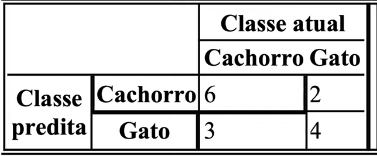

Dos 9 cachorros da amostra, 6 foram preditos corretamente, mas 3 foram preditos como sendo da classe de gatos. Já dos 6 gatos, 4 foram preditos corretamente e 2 foram preditos como sendo da classe de cachorros. Todas as predições corretas ficam na diagonal da matriz, tornando mais fácil sua compreensão. Logo, quanto mais valores estiverem encaixados na diagonal da matriz, mais preciso é o modelo de predição.

### Matriz de confusão

In [29]:
# confusion matrix
cm = confusion_matrix(y_teste, y_pred)
print(cm)

[[38 10]
 [ 3 39]]


De acordo com a matriz de confusão acima, 77 observações tiveram suas classes preditas corretamente, e 13 foram preditas incorretamente, um resultado relativamente eficiente.

### F1 Score 

A medida F1 score pode ser interpretada como uma média ponderada da precisão (precision) e recuperação (recall). Seu melhor valor é 1 e seu pior é 0.

É calculada com a seguinte fórmula:

$F1 = 2 \left (\frac{precision \times recall}{precision + recall}\right) $

In [30]:
# f1 score
print("F1 score:", f1_score(y_teste, y_pred, average='micro'))

F1 score: 0.8555555555555555


### Precision Score

Precision score é a razão $\frac{tp}{tp + fp}$ onde `tp` é o número de verdadeiros positivos e `fp` o número de falsos positivos. O precision é intuitivamente a capacidade do classificador de não rotular como positiva uma amostra negativa.

In [31]:
# precision score
print("Precision score:", precision_score(y_teste, y_pred, average='micro'))

Precision score: 0.8555555555555555


### Recall Score

Recall score é a razão $\frac{tp}{tp + fn}$ em que `tp` é o número de verdadeiros positivos e `fn` o número de falsos negativos. O recall é intuitivamente a capacidade do classificador de encontrar todas as amostras positivas.

In [32]:
# recall score
print("Recall score:", recall_score(y_teste, y_pred, average='micro'))

Recall score: 0.8555555555555555


### Accuracy Score

Na classificação multilabel, esta função calcula a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto correspondente de rótulos em `y_true`.

In [33]:
# accuracy score
print(accuracy_score(y_teste, y_pred))

0.8555555555555555


Como é possível observar, os valores de f1, precision, recall e accuracy score são extremamente semelhantes e todos bem próximos de seus valores máximos (1), o que denota um bom modelo de predição. 

## Testando a acurácia com o k = raiz quadrada do tamanho do conjunto

In [34]:
# classificador
classificador_raiz = KNeighborsClassifier(n_neighbors=raiz, metric="euclidean")
classificador_raiz.fit(X_treino, y_treino)
y_pred_raiz = classificador_raiz.predict(X_teste)
y_pred_raiz

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [35]:
# confusion matrix
cm_raiz = confusion_matrix(y_teste, y_pred_raiz)
print(cm_raiz)

[[37 11]
 [ 3 39]]


In [36]:
# f1 score
print("F1 score:", f1_score(y_teste, y_pred_raiz, average='micro'))

F1 score: 0.8444444444444444


### Dataset 2: possibilidade de ataque cardíaco

O segundo dataset de exemplo trata sobre possibilidade de ataque cardíaco em uma pessoa, considerando os seguintes atributos:
- Idade;
- Sexo;
- Tipo de dor no peito (4 valores);
- Pressão sanguínea em repouso ;
- Colesterol sérico em mg / dl;
- Açúcar no sangue em jejum > 120 mg / dl;
- Resultados eletrocardiográficos de repouso (valores 0,1,2)
- Frequência cardíaca máxima alcançada
- Angina induzida por exercício
- Pico antigo = depressão de ST induzida por exercício em relação ao repouso
- Inclinação do segmento ST de pico do exercício
- Número de vasos principais (0-3) coloridos por fluorosopia
- Thal: 0 = normal; 1 = defeito corrigido; 2 = defeito reversível

E duas classes:
- 0: menos chance de ataque cardíaco
- 1: mais chance de ataque cardíaco

In [37]:
# carregando os dados
heart = mini.heart()
atributos_heart = heart.data
target_heart = heart.target

In [38]:
# padronizando os dados
padronizador_heart = StandardScaler()

atributos_padronizados_heart = padronizador_heart.fit_transform(atributos_heart)

In [39]:
# definindo uma quantidade de vizinhos mais próximos (k)
vizinhos_mais_prox_heart = NearestNeighbors(n_neighbors=6).fit(atributos_padronizados_heart)

In [40]:
# uma nova observação
ajuste_array_heart = [62.0, 1.0, 3.0, 145.0, 230.0, 1.0, 0.0, 153.0, 0.0, 2.3, 0.0, 0.0, 1.0]

In [41]:
# distâncias dos vizinhos e seus índices na lista de atributos
distâncias_heart, índices_heart = vizinhos_mais_prox_heart.kneighbors([ajuste_array_heart])
distâncias_heart, índices_heart

(array([[313.64952215, 315.10244737, 315.13595444, 315.14023223,
         315.49704616, 315.53975897]]),
 array([[ 85, 248, 220,  28, 110,  96]], dtype=int64))

### Criando um classificador dos ```k``` vizinhos mais próximos

In [42]:
# carregando os dados
X_heart = heart.data
y_heart = heart.target

In [43]:
# padronizador
padronizador_heart = StandardScaler()
X_std_heart = padronizador_heart.fit_transform(X_heart)
X_std_heart

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [44]:
# classificador
knn_heart = KNeighborsClassifier(n_neighbors=6, n_jobs=1).fit(X_std_heart, y_heart)

In [45]:
# novas observações
novas_observacoes_heart = [
    [63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0],
    [45.0, 1.0, 1.0, 128.0, 308.0, 0.0, 0.0, 170.0, 0.0, 0.0, 2.0, 0.0, 2.0]
]

In [46]:
# predição das classes das novas observações
knn_heart.predict(novas_observacoes_heart)

array([1., 0.])

### Encontrando o `k` ideal para o dataset sobre ataque cardíaco

In [47]:
# carregando os dados
atributos_heart = heart.data
alvo_heart = heart.target

In [48]:
# padronizador
padronizador_heart = StandardScaler()
atributos_padronizados_heart = padronizador_heart.fit_transform(atributos_heart)

In [49]:
# classificador
knn_heart = KNeighborsClassifier(n_neighbors=12, n_jobs=-1)

In [50]:
# pipeline
pipe_heart = Pipeline([("padronizador", padronizador_heart), ("knn", knn_heart)])

In [51]:
# espaço de busca para k
espaço_de_busca_heart = [{"knn__n_neighbors": [n for n in range(1,31)]}]

In [52]:
# grid de busca
classificador_heart = GridSearchCV(pipe_heart, espaço_de_busca_heart, cv=6, verbose=0).fit(atributos_padronizados_heart, alvo_heart)

In [53]:
# número ideal de vizinhos para o dataset
k_ideal_heart = classificador_heart.best_estimator_.get_params()["knn__n_neighbors"]
k_ideal_heart

16

In [54]:
# teste empírico da regra prática
raiz_heart = int(sqrt(len(alvo_heart)))
print("Tamanho do dataset: {}".format(len(alvo_heart)))
print("raiz quadrada (inteira) do tamanho do dataset {}".format(raiz_heart))

Tamanho do dataset: 303
raiz quadrada (inteira) do tamanho do dataset 17


## Testando a acurácia do modelo com `k_ideal_heart`

In [55]:
# dividindo o conjunto em treino e teste
X_treino_heart, X_teste_heart, y_treino_heart, y_teste_heart = train_test_split(atributos_heart, alvo_heart, random_state=0, test_size=.25)

In [56]:
# padronizador
padronizador_heart = StandardScaler()
X_treino_heart = padronizador_heart.fit_transform(X_treino_heart)
X_teste_heart = padronizador_heart.transform(X_teste_heart)

In [57]:
# calssificador
classificador_heart = KNeighborsClassifier(n_neighbors=k_ideal_heart, metric="euclidean")
classificador_heart.fit(X_treino_heart, y_treino_heart)
y_pred_heart = classificador_heart.predict(X_teste_heart)
y_pred_heart

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1.])

In [58]:
# matriz de confusão
cm_heart = confusion_matrix(y_teste_heart, y_pred_heart)
print(cm_heart)

[[23 10]
 [ 4 39]]


In [59]:
# F1 score
print("F1 score:", f1_score(y_teste_heart, y_pred_heart, average='micro'))

F1 score: 0.8157894736842104


In [60]:
# Precision score
print("Precision score:", precision_score(y_teste_heart, y_pred_heart, average='micro'))

Precision score: 0.8157894736842105


In [61]:
# Recall score
print("Recall score:", recall_score(y_teste_heart, y_pred_heart, average='micro'))

Recall score: 0.8157894736842105


In [62]:
# Accuracy score
print("accuracy_score:",accuracy_score(y_teste_heart, y_pred_heart))

accuracy_score: 0.8157894736842105


## Testando a acurácia com o k = raiz quadrada do tamanho do conjunto

In [63]:
classificador_heart_raiz = KNeighborsClassifier(n_neighbors=raiz_heart, metric="euclidean")
classificador_heart_raiz.fit(X_treino_heart, y_treino_heart)
y_pred_heart_raiz = classificador_heart_raiz.predict(X_teste_heart)
y_pred_heart_raiz

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1.])

In [64]:
# matriz de confusão
cm_heart_raiz = confusion_matrix(y_teste_heart, y_pred_heart_raiz)
print(cm_heart_raiz)

[[22 11]
 [ 2 41]]


In [65]:
# F1 score
print("F1 score:", f1_score(y_teste_heart, y_pred_heart_raiz, average='micro'))

F1 score: 0.8289473684210527


### Dataset 3: categorias de vidro

O terceiro dataset de exemplo trata sobre categorias de vidro, considerando os atributos:
- RI: índice de refração

(unidade de medida para os atributos seguintes: porcentagem em peso no óxido correspondente)
- Na: Sódio 
- Mg: Magnésio
- Al: Alumínio
- Si: Silício
- K: Potássio
- Ca: Cálcio
- Ba: Bário
- Fe: Ferro

E sete classes:

- 1 buildingwindowsfloatprocessed (construção de janelas flutuante processado)
- 2 buildingwindowsnonfloatprocessed (construção de janelas não flutuante processado)
- 3 vehiclewindowsfloatprocessed (janela de veículos flutuante processado)
- 4 vehiclewindowsnonfloatprocessed (janela de veículos não flutuante processado) [NENHUM NESTE CONJUNTO]
- 5 recipientes
- 6 talheres
- 7 faróis

In [66]:
# carregando os dados
glass = mini.glass()
atributos_glass = glass.data
target_glass = glass.target

atributos_glass

[[1.52101, 13.64, 4.49, 1.1, 71.78, 0.06, 8.75, 0.0, 0.0],
 [1.5176100000000001, 13.89, 3.6, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0],
 [1.5161799999999999, 13.53, 3.55, 1.54, 72.99, 0.39, 7.78, 0.0, 0.0],
 [1.51766, 13.21, 3.69, 1.29, 72.61, 0.57, 8.22, 0.0, 0.0],
 [1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0],
 [1.51596, 12.79, 3.61, 1.62, 72.97, 0.64, 8.07, 0.0, 0.26],
 [1.5174299999999998, 13.3, 3.6, 1.14, 73.09, 0.58, 8.17, 0.0, 0.0],
 [1.51756, 13.15, 3.61, 1.05, 73.24, 0.57, 8.24, 0.0, 0.0],
 [1.51918, 14.04, 3.58, 1.37, 72.08, 0.56, 8.3, 0.0, 0.0],
 [1.51755, 13.0, 3.6, 1.36, 72.99, 0.57, 8.4, 0.0, 0.11],
 [1.5157100000000001, 12.72, 3.46, 1.56, 73.2, 0.67, 8.09, 0.0, 0.24],
 [1.51763, 12.8, 3.66, 1.27, 73.01, 0.6, 8.56, 0.0, 0.0],
 [1.51589, 12.88, 3.43, 1.4, 73.28, 0.69, 8.05, 0.0, 0.24],
 [1.51748, 12.86, 3.56, 1.27, 73.21, 0.54, 8.38, 0.0, 0.17],
 [1.51763, 12.61, 3.59, 1.31, 73.29, 0.58, 8.5, 0.0, 0.0],
 [1.5176100000000001, 12.81, 3.54, 1.23, 73.24, 0.58, 8.39, 0.0,

In [67]:
# padronizador
padronizador_glass = StandardScaler()

Atributos_padronizados_glass = padronizador_glass.fit_transform(atributos_glass)

In [68]:
vizinhos_mais_prox_glass = NearestNeighbors(n_neighbors=6).fit(Atributos_padronizados_glass)

In [69]:
# uma nova observação
ajuste_array_glass = [1.51589, 12.88, 3.43, 1.4, 73.28, 0.69, 8.05, 0.0, 0.24]

In [70]:
# distâncias e índices dos vizinhos de ajuste_array_glass
distâncias_glass, índices_glass = vizinhos_mais_prox_glass.kneighbors([ajuste_array_glass])
distâncias_glass, índices_glass

(array([[71.24835625, 72.28811217, 72.56001838, 72.64759221, 73.50060868,
         73.54176099]]),
 array([[184, 201, 180, 109, 202, 168]], dtype=int64))

## Criando um classificador dos ```k``` vizinhos mais próximos

In [71]:
# dados
X_glass = glass.data
y_glass = glass.target

In [72]:
# padronizador
padronizador_glass = StandardScaler()
X_std_glass = padronizador_glass.fit_transform(X_glass)
X_std_glass

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [73]:
# classificador
knn_glass = KNeighborsClassifier(n_neighbors=6, n_jobs=1).fit(X_std_glass, y_glass)

In [74]:
# novas observações
novas_observacoes_glass = [
    [1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0],
    [1.51742, 13.3, 3.6, 1.14, 73.09, 0.58, 8.17, 0.0, 0.0]
]

In [75]:
# predizendo a classe das novas observações
knn_glass.predict(novas_observacoes_glass)

array([6., 6.])

### Encontrando o `k` ideal para o dataset de categorização de vidros

In [76]:
# dados
atributos_glass = glass.data
alvo_glass = glass.target

In [77]:
# padronizador
padronizador_glass = StandardScaler()
atributos_padronizados_glass = padronizador_glass.fit_transform(atributos_glass)

In [78]:
# calssificador
knn_glass = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)

In [79]:
# pipeline
pipe_glass = Pipeline([("padronizador", padronizador_glass), ("knn", knn_glass)])

In [80]:
# espaço de busca
espaço_de_busca_glass = [{"knn__n_neighbors": [n for n in range(1,31)]}]

In [81]:
# grid de busca
classificador_glass = GridSearchCV(pipe_glass, espaço_de_busca_glass, cv=9).fit(atributos_padronizados_glass, alvo_glass)

In [82]:
# k ideal para o dataset
k_ideal_glass = classificador_glass.best_estimator_.get_params()["knn__n_neighbors"]
k_ideal_glass

2

In [83]:
# teste empírico da regra prática
raiz_glass = int(sqrt(len(alvo_glass)))
print("Tamanho do dataset: {}".format(len(alvo_glass)))
print("raiz quadrada do tamanho do dataset {}".format(raiz_glass))

Tamanho do dataset: 214
raiz quadrada do tamanho do dataset 14


## Testando a acurácia do modelo com `k_ideal_glass`

In [84]:
# dividindo o conjunto em treino e teste
X_treino_glass, X_teste_glass, y_treino_glass, y_teste_glass = train_test_split(atributos_glass, alvo_glass, random_state=0, test_size=.3)

In [85]:
# padronizador
padronizador_glass = StandardScaler()
X_treino_glass = padronizador_glass.fit_transform(X_treino_glass)
X_teste_glass = padronizador_glass.transform(X_teste_glass)

In [86]:
# classificador
classificador_glass = KNeighborsClassifier(n_neighbors = k_ideal_glass, metric="euclidean")
classificador_glass.fit(X_treino_glass, y_treino_glass)
y_pred_glass = classificador_glass.predict(X_teste_glass)
y_pred_glass

array([7., 1., 1., 6., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 7., 1.,
       1., 1., 1., 5., 1., 7., 7., 1., 1., 7., 1., 2., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 7., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
       2., 7., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.])

In [87]:
# matriz de confusão
cm_glass = confusion_matrix(y_teste_glass, y_pred_glass)
print(cm_glass)

[[20  1  0  0  0  0]
 [ 8 18  0  0  0  0]
 [ 7  0  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  0  7]]


In [88]:
# f1 score
print("F1 score:", f1_score(y_teste_glass , y_pred_glass , average='micro'))

F1 score: 0.723076923076923


In [89]:
# precision score
print("Precision score:", precision_score(y_teste_glass, y_pred_glass, average='micro'))

Precision score: 0.7230769230769231


In [90]:
# recall score
print("Recall score:", recall_score(y_teste_glass, y_pred_glass, average='micro'))

Recall score: 0.7230769230769231


In [91]:
# accuracy score
print("accuracy_score:",accuracy_score(y_teste_glass, y_pred_glass))

accuracy_score: 0.7230769230769231


## Testando a acurácia com o k = raiz quadrada do tamanho do conjunto

In [92]:
# classificador
classificador_glass_raiz = KNeighborsClassifier(n_neighbors = raiz_glass, metric="euclidean")
classificador_glass_raiz.fit(X_treino_glass, y_treino_glass)
y_pred_glass_raiz = classificador_glass_raiz.predict(X_teste_glass)
y_pred_glass_raiz

array([7., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 7., 1.,
       1., 1., 2., 2., 1., 7., 7., 1., 1., 7., 1., 2., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 7., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
       6., 7., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1.])

In [93]:
cm_glass_raiz = confusion_matrix(y_teste_glass, y_pred_glass_raiz)
print(cm_glass_raiz)

[[19  2  0  0  0  0]
 [10 15  0  0  1  0]
 [ 5  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  0  0  0  7]]


In [94]:
# f1 score
print("F1 score:", f1_score(y_teste_glass , y_pred_glass_raiz , average='micro'))

F1 score: 0.6307692307692307


## Resposta à questão de projeto

Para o dataset 1 (dados de envio em e-commerce) os valores de f1 score usando o `k_ideal=15` (obtido através de Pipeline e GridSearchCV) e usando `k_raiz=17` (obtido através do cálculo da raiz quadrada do tamanho do conjunto de dados) foram, respectivamente: 0.8555555555555555 e 0.8444444444444444. Percebe-se que são extremamente semelhantes, apesar de a acurácia do modelo ao utilizar o `k_ideal` ser minimamente superior.

Para o dataset 2 (chance de ataque cardíaco) os valores de f1 score usando o `k_ideal=16` e usando `k_raiz=17` foram, respectivamente: 0.8157894736842104 e 0.8289473684210527. Neste caso em específico a acurácia ao usar o `k_raiz` foi minimamente superior.

Para o dataset 3 (classificação de vidros) os valores de f1 score usando o `k_ideal=2` e usando `k_raiz=14` foram, respectivamente: 0.723076923076923 e 0.6307692307692307. Neste caso a diferença entre as duas acurácias é notável.

Portanto, a partir da implementação do algoritmo KNN nesses 3 conjuntos de dados, visto que a as diferenças entre `k_ideal` e `k_raiz` podem impactar grandemente o modelo e que, na maioria dos casos, o `k_ideal` resultou em uma precisão maior, pode-se inferir que o mais correto é utilizar dos objetos, funções e métodos da biblioteca sklearn para encontrar o melhor valor de `k` a fim de atingir um modelo de predição mais acurado.

## Referência Bibliográfica
Pacote sklearn: https://scikit-learn.org/stable/index.html

Nearest Neighbors: https://scikit-learn.org/stable/modules/neighbors.html 

Distância Euclidiana: http://computacaointeligente.com.br/algoritmos/k-vizinhos-mais-proximos/#:~:text=cada%20uma%20delas.-,C%C3%A1lculo%20da%20dist%C3%A2ncia,Euclidiana%2C%20descrita%20pela%20equa%C3%A7%C3%A3o%201.

Distância Manhattan: https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

Distância Minkowski: https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d#:~:text=We%20use%20Manhattan%20Distance%20if,setting%20p%27s%20value%20as%201.

Distância Hamming: https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_de_Hamming

StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

F1 Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Precision Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision%20score#sklearn.metrics.precision_score

Recall Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall%20score#sklearn.metrics.recall_score

Accuracy Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy%20score#sklearn.metrics.accuracy_score